In [1]:
#1
# Choosing a dataset to work with

import pandas as pd

zoo = pd.read_csv('zoo.data')

display(zoo)

,Name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
96,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
97,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
98,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


 
 
 
 
 
The dataset has 100 animals, within 7 classes:
     1 - animals / animale 
     2 - birds / pasari
     3 - reptile / reptiles
     4 - fish / pesti
     5 - amphibians / amfibieni
     6 - insects / insecte
     7 - invertebrates / nevertebrate  
         

In [11]:
#2
#Count & Classification 

import pandas as pd

zoo = pd.read_csv('zoo.data')



#Count
def countZoo(classes):
    for type in zoo['type']:
        classes[type-1] = (classes[type-1][0],classes[type-1][1]+1 ) #+= 1

types = ["animals", "birds", "reptile", "fish", "amphibians", "insects", "invertebrates"]
zeros = np.zeros(len(types), dtype = int)
classes = list(zip(types, zeros))
countZoo(classes)



#Classify
def classifyZooByType():
    classes = [[], [], [], [], [], [], []]
    for name, type in zip(zoo['Name'], zoo['type']):
        classes[type-1] = np.append(classes[type-1], name)
    return classes

classifiedZoo = classifyZooByType()



#Display
def informAudience(matrix):
    print("")
    kth = 0
    for line in matrix:
        print("Type " + classes[kth][0] +", "+ (classes[kth][1]).astype('str') +" species: ")
        
        for item in line:
            print(item+", ", end = ' ')
            
        print("")
        if kth != 6:
            print("--------------------------------------------------------")
            kth +=1
        print("")
        
informAudience(classifiedZoo)


Type animals, 41 species: 
aardvark,  antelope,  bear,  boar,  buffalo,  calf,  cavy,  cheetah,  deer,  dolphin,  elephant,  fruitbat,  giraffe,  girl,  goat,  gorilla,  hamster,  hare,  leopard,  lion,  lynx,  mink,  mole,  mongoose,  opossum,  oryx,  platypus,  polecat,  pony,  porpoise,  puma,  pussycat,  raccoon,  reindeer,  seal,  sealion,  squirrel,  vampire,  vole,  wallaby,  wolf,  
--------------------------------------------------------

Type birds, 20 species: 
chicken,  crow,  dove,  duck,  flamingo,  gull,  hawk,  kiwi,  lark,  ostrich,  parakeet,  penguin,  pheasant,  rhea,  skimmer,  skua,  sparrow,  swan,  vulture,  wren,  
--------------------------------------------------------

Type reptile, 5 species: 
pitviper,  seasnake,  slowworm,  tortoise,  tuatara,  
--------------------------------------------------------

Type fish, 13 species: 
bass,  carp,  catfish,  chub,  dogfish,  haddock,  herring,  pike,  piranha,  seahorse,  sole,  stingray,  tuna,  
---------------






 This dataset have 18 atributes, most of them are boolean type, excepting these:
    - position 1 - name
    - position 14 - legs
    - position 18 - type
         

Text(0, 0.5, 'Number of animals')

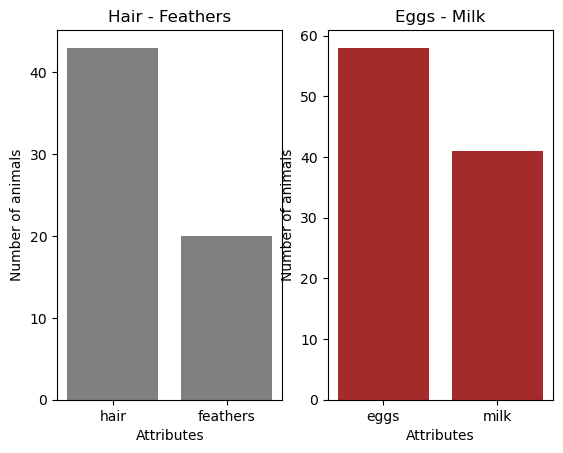

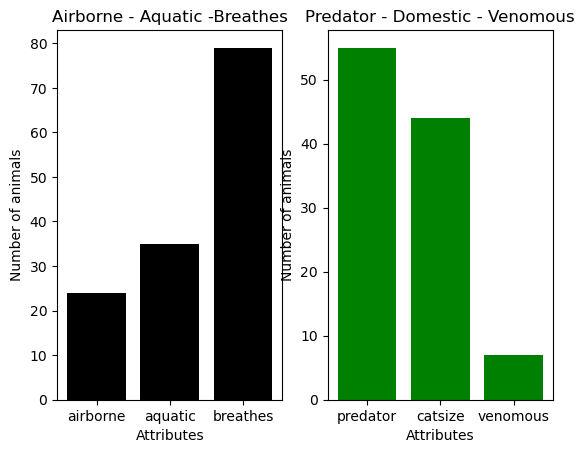

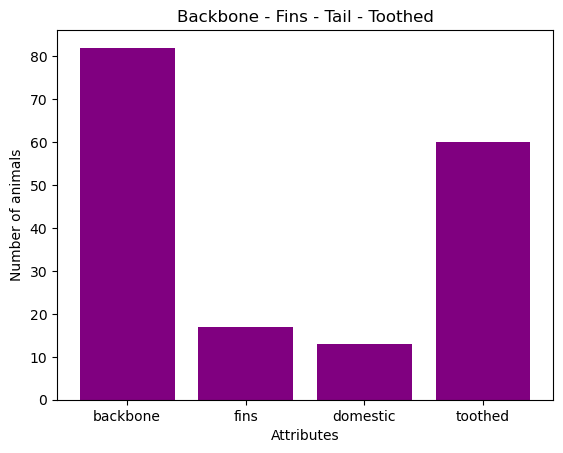

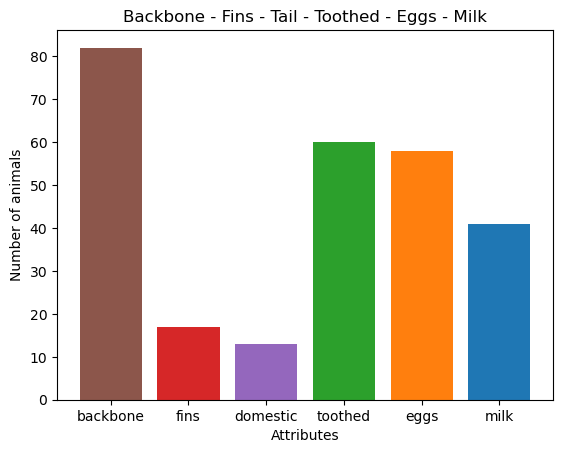

In [10]:
#3
#Classifying data by attributes ( a sort of clustering )

import pandas as pd
import numpy as np
import random as rn
import matplotlib.pyplot as plt 

zoo = pd.read_csv('zoo.data')
    

#using a list of tuples

tuples = list(zip(
    ['hair', 'feathers', 'eggs' , 'milk','airborne', 'aquatic',
      'predator', 'toothed','backbone','breathes' , 'venomous', 'fins',
      'tail', 'domestic', 'catsize'],
    np.zeros(15, dtype = int) 
))


def CountBooleanValue(arr):
    number = 0
    for value in arr :
        if value == 1:
            number+=1
    return number

def countAllBoolAtributes():
    for kth in range(len(tuples)):
        tuples[kth] = (tuples[kth][0], CountBooleanValue(zoo[tuples[kth][0]]))
   

countAllBoolAtributes()

unzipped_tuples = list(zip(*tuples))



 # Hair - Feathers | Eggs - Milk
figure1, axis1 = plt.subplots(1, 2)

axis1[0].bar([unzipped_tuples[0][0], unzipped_tuples[0][1]],
        [unzipped_tuples[1][0], unzipped_tuples[1][1]],
            color = "grey")
axis1[0].set_title("Hair - Feathers")
axis1[0].set_xlabel('Attributes')
axis1[0].set_ylabel('Number of animals')


#---|---
    
axis1[1].bar([unzipped_tuples[0][2], unzipped_tuples[0][3]],
        [unzipped_tuples[1][2], unzipped_tuples[1][3]],
             color = "brown" )
axis1[1].set_title("Eggs - Milk")
axis1[1].set_xlabel('Attributes')
axis1[1].set_ylabel('Number of animals')




 # Airborne - Aquatic -Breathes | Predator - Domestic - Venomous
figure2, axis2 = plt.subplots(1, 2)

axis2[0].bar([unzipped_tuples[0][4], unzipped_tuples[0][5], unzipped_tuples[0][9]],
        [unzipped_tuples[1][4], unzipped_tuples[1][5], unzipped_tuples[1][9]],
             color = "black" )
axis2[0].set_title("Airborne - Aquatic -Breathes")
axis2[0].set_xlabel('Attributes')
axis2[0].set_ylabel('Number of animals')


#---|---

axis2[1].bar([unzipped_tuples[0][6], unzipped_tuples[0][14], unzipped_tuples[0][10]],
        [unzipped_tuples[1][6], unzipped_tuples[1][14], unzipped_tuples[1][10]],
             color = "g" )
axis2[1].set_title("Predator - Domestic - Venomous")
axis2[1].set_xlabel('Attributes')
axis2[1].set_ylabel('Number of animals')



 #Backbone - Fins - Tail - Toothed
figure3, axis3 = plt.subplots(1, 1)

axis3.bar(
        [unzipped_tuples[0][8], unzipped_tuples[0][11], unzipped_tuples[0][13], unzipped_tuples[0][7]],
        [unzipped_tuples[1][8], unzipped_tuples[1][11], unzipped_tuples[1][13], unzipped_tuples[1][7]],
            color = "purple")
axis3.set_title("Backbone - Fins - Tail - Toothed")
axis3.set_xlabel('Attributes')
axis3.set_ylabel('Number of animals')



 #Backbone - Fins - Tail - Toothed - Eggs - Milk
figure4, axis4 = plt.subplots(1, 1)

#This is how to give colors to each bar
axis4.bar(
        [unzipped_tuples[0][8], unzipped_tuples[0][11], unzipped_tuples[0][13], unzipped_tuples[0][7],
         unzipped_tuples[0][2], unzipped_tuples[0][3]],
        [unzipped_tuples[1][8], unzipped_tuples[1][11], unzipped_tuples[1][13], unzipped_tuples[1][7],
        unzipped_tuples[1][2], unzipped_tuples[1][3]])
axis4.bar(
    [unzipped_tuples[0][8], unzipped_tuples[0][11], unzipped_tuples[0][13], unzipped_tuples[0][7],
         unzipped_tuples[0][2]],
    [unzipped_tuples[1][8], unzipped_tuples[1][11], unzipped_tuples[1][13], unzipped_tuples[1][7],
        unzipped_tuples[1][2]])
axis4.bar(
    [unzipped_tuples[0][8], unzipped_tuples[0][11], unzipped_tuples[0][13], unzipped_tuples[0][7]],
    [unzipped_tuples[1][8], unzipped_tuples[1][11], unzipped_tuples[1][13], unzipped_tuples[1][7]])
axis4.bar(
    [unzipped_tuples[0][8], unzipped_tuples[0][11], unzipped_tuples[0][13]],
    [unzipped_tuples[1][8], unzipped_tuples[1][11], unzipped_tuples[1][13]])
axis4.bar(
    [unzipped_tuples[0][8], unzipped_tuples[0][13]],
    [unzipped_tuples[1][8], unzipped_tuples[1][13]])
axis4.bar(
    [unzipped_tuples[0][8],],
    [unzipped_tuples[1][8],])
axis4.set_title("Backbone - Fins - Tail - Toothed - Eggs - Milk")
axis4.set_xlabel('Attributes')
axis4.set_ylabel('Number of animals')

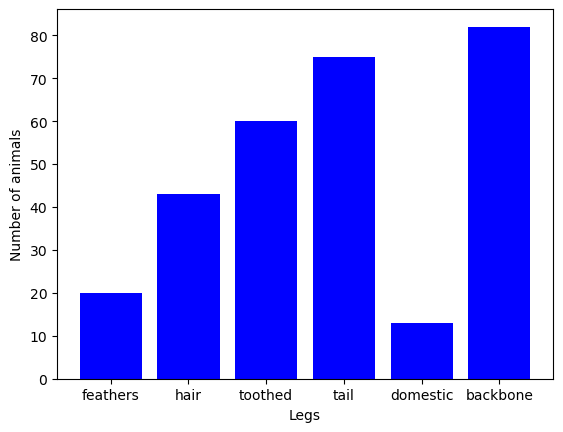

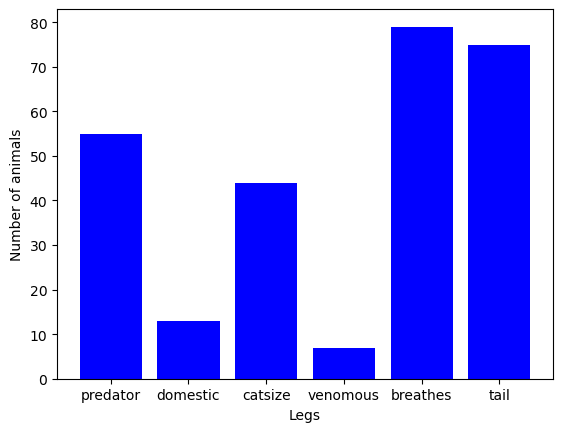

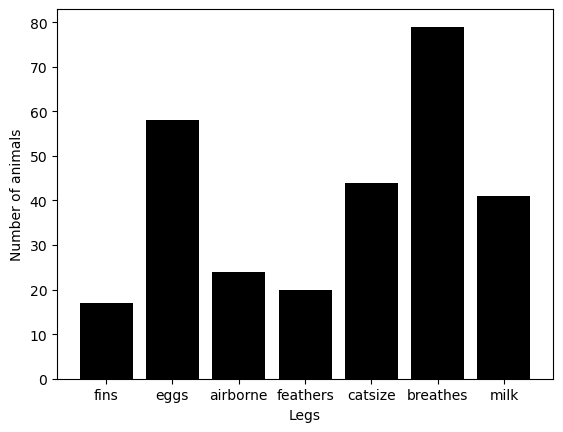

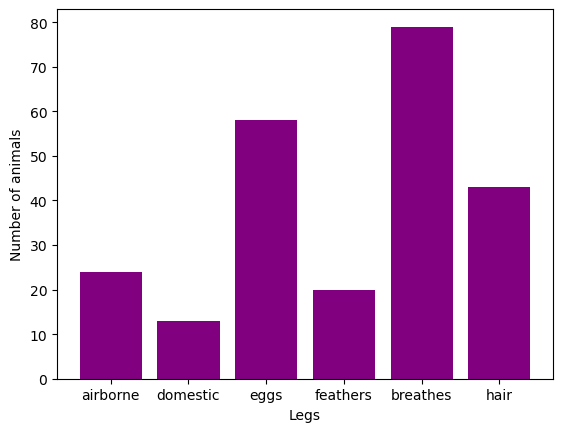

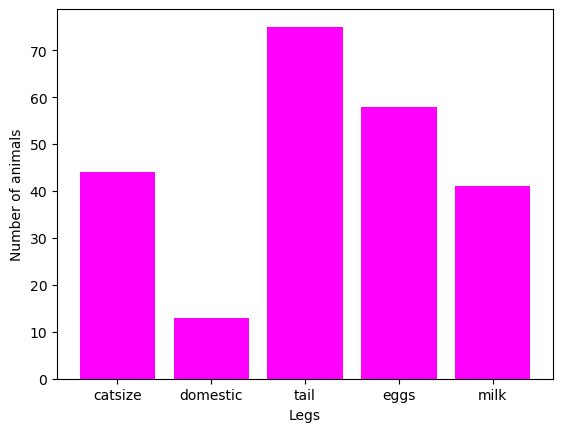

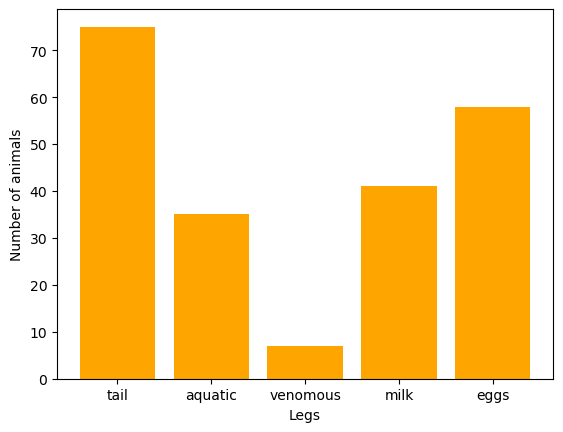

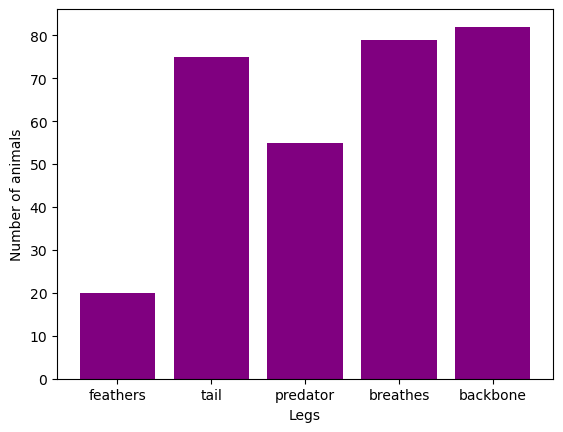

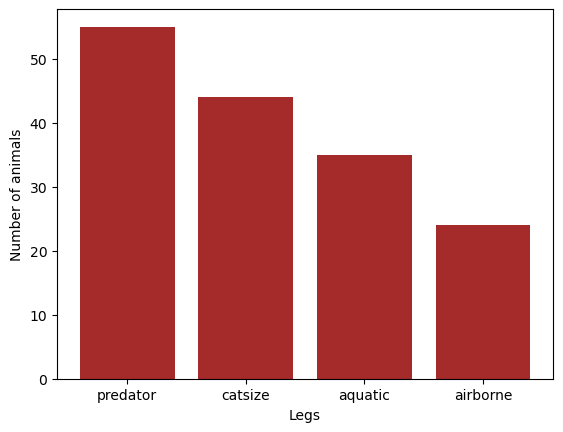

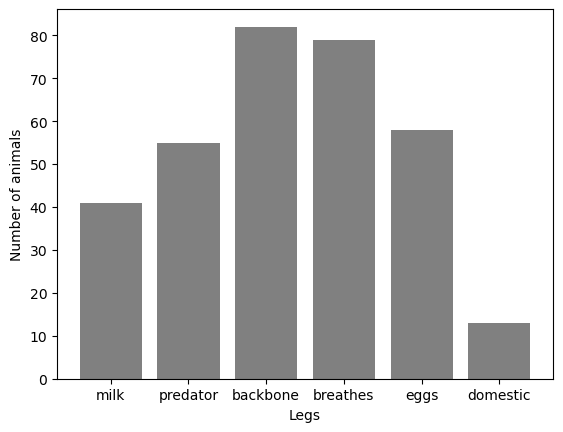

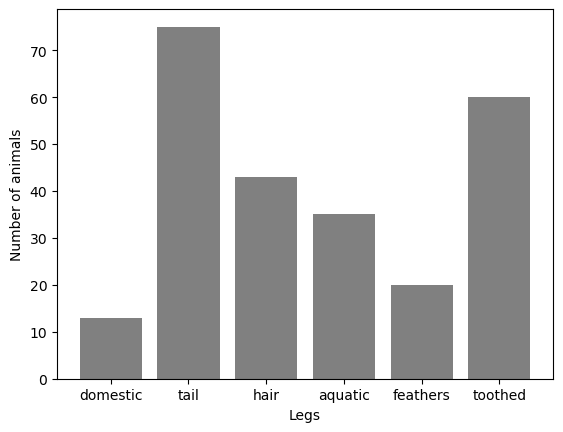

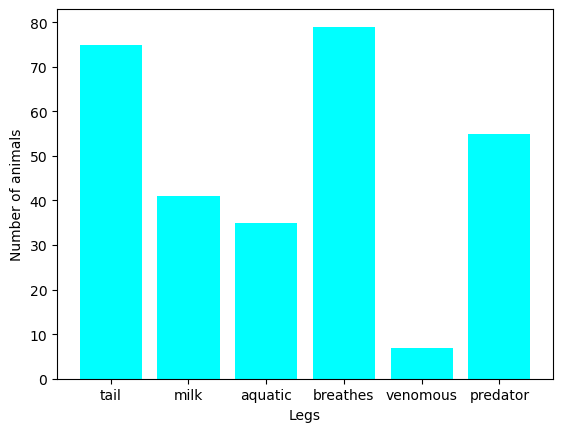

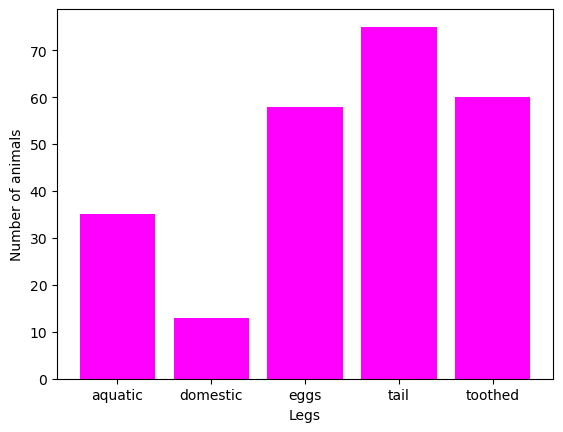

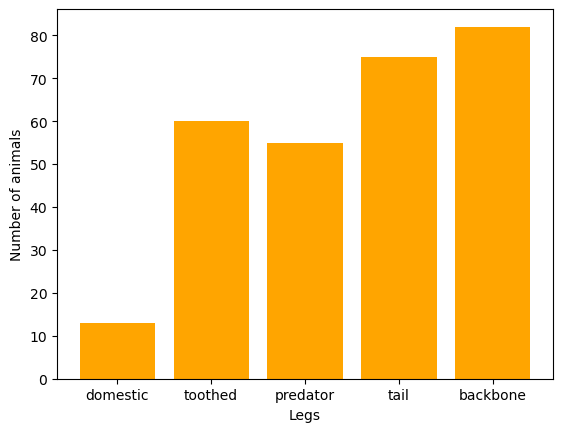

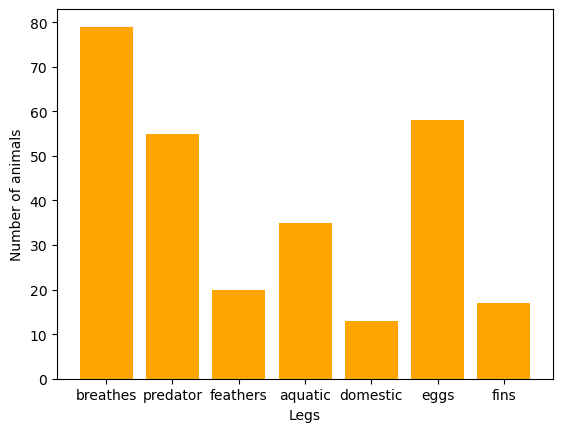

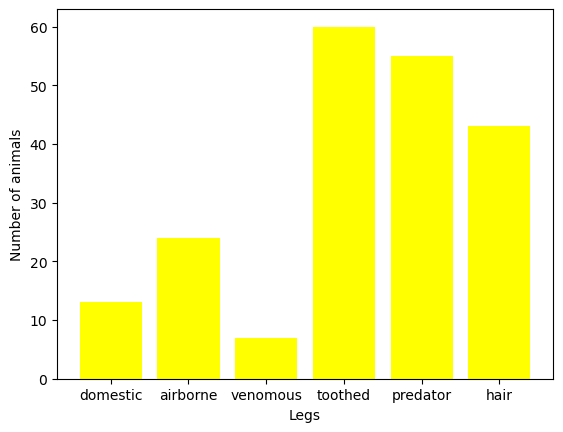

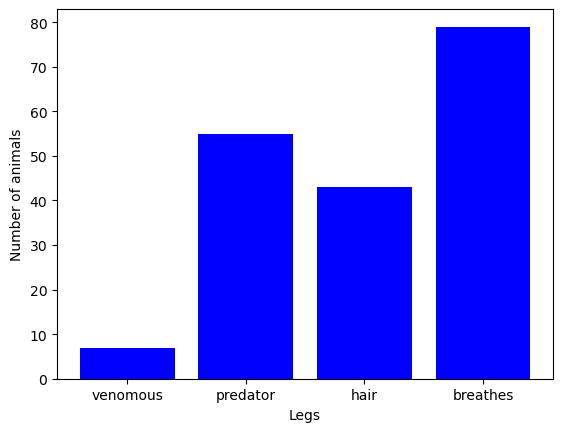

In [9]:
#4
# Random plotting : data is randomly chosen

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import random

zoo = pd.read_csv('zoo.data')


tuples = list(zip(
    ['hair', 'feathers', 'eggs' , 'milk','airborne', 'aquatic',
      'predator', 'toothed','backbone','breathes' , 'venomous', 'fins',
      'tail', 'domestic', 'catsize'],
    np.zeros(15, dtype = int)
))

colors = ["brown", "purple", "orange", "black",
          "blue", "red", "grey", "magenta",
          "yellow", "cyan" ]
    

def CountBooleanValue(arr):
    number = 0
    for value in arr :
        if value == 1:
            number+=1
    return number

def countAllBoolAtributes():
    for kth in range(len(tuples)):
        tuples[kth] = (tuples[kth][0], CountBooleanValue(zoo[tuples[kth][0]]))
   

countAllBoolAtributes()

unzipped_tuples = list(zip(*tuples))

def plot_random():
    figure, axis = plt.subplots(1, 1)
    left_argument = []
    right_argument = []
    x = 0
    for i in range(7):
        random_color = random.randint(0, len(colors)-1)
        random_attribute = random.randint(0, 14)            
        color = colors[random_color]
        left_argument.append(unzipped_tuples[0][random_attribute])
        right_argument.append(unzipped_tuples[1][random_attribute])
    axis.bar(left_argument, right_argument, color = color)
    axis.set_xlabel('Legs')
    axis.set_ylabel('Number of animals')
    plt.show()

plot_random()
plot_random()
plot_random()
plot_random()

plot_random()
plot_random()
plot_random()
plot_random()

plot_random()
plot_random()
plot_random()
plot_random()

plot_random()
plot_random()
plot_random()
plot_random()



Counted species by legs:
[(0, 23), (2, 27), (4, 37), (5, 1), (6, 10), (8, 2)]
:


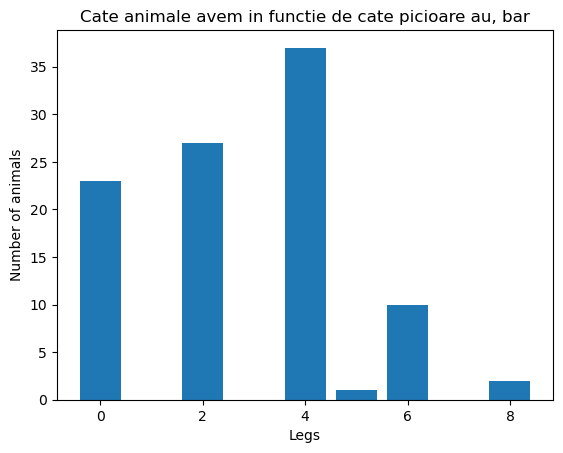

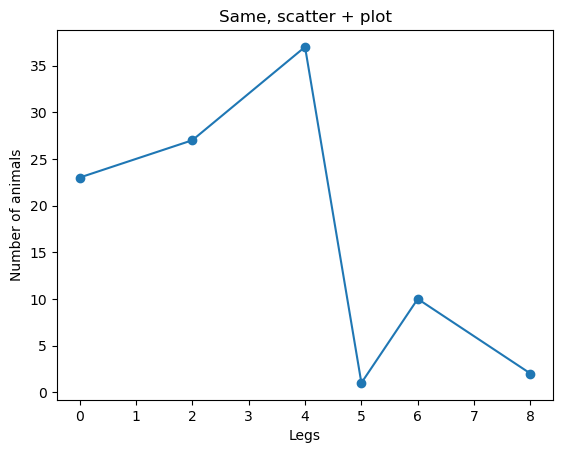

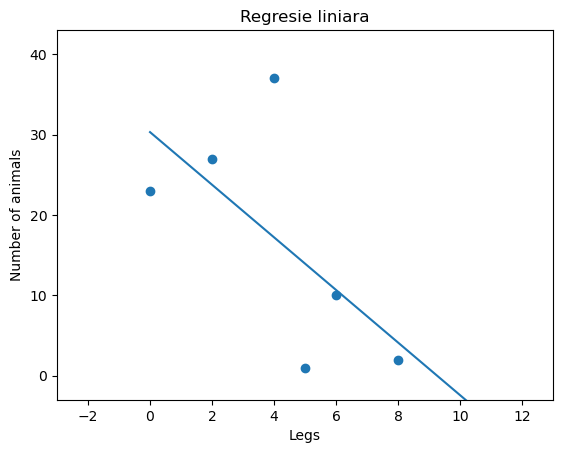

In [8]:
#5
#Liniar regression and a sort of clustering

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

zoo = pd.read_csv('zoo.data')


def countLegs():
    for value in zoo['legs']:
        if value == 0:
            zeros[0] +=1
        if value == 2:
            zeros[1] +=1
        if value == 4:
            zeros[2] +=1
        if value == 5:
            zeros[3] +=1
        if value == 6:
            zeros[4] +=1
        if value == 8:
            zeros[5] +=1

            
legs = [0, 2, 4, 5, 6, 8]
zeros = np.zeros(len(legs), dtype = int)
countLegs()
counted_legs = list(zip(legs, zeros))

print("Counted species by legs:")
print(counted_legs)

unziped_counted_legs =list(zip(*counted_legs)) 

#bar
figure1, axis1 = plt.subplots(1, 1)
axis1.set_title("Cate animale avem in functie de cate picioare au, bar")
axis1.set_xlabel('Legs')
axis1.set_ylabel('Number of animals')
axis1.bar(unziped_counted_legs[0], unziped_counted_legs[1])


#scatter + plot
print(":")
figure3, axis3 = plt.subplots(1, 1)
axis3.set_title("Same, scatter + plot")
axis3.set_xlabel('Legs')
axis3.set_ylabel('Number of animals')
axis3.plot(unziped_counted_legs[0], unziped_counted_legs[1])
axis3.scatter(unziped_counted_legs[0], unziped_counted_legs[1])


#regresie liniara
figure4, axis4 = plt.subplots(1, 1)
axis4.set_title("Regresie liniara")
axis4.set_xlabel('Legs')
axis4.set_ylabel('Number of animals')
plt.xlim((-3, 13))
plt.ylim((-3, 43))

axis4.scatter(unziped_counted_legs[0], unziped_counted_legs[1])

x = unziped_counted_legs[0]
y = unziped_counted_legs[1]

auxOnes = np.ones((len(x), 1))
#print(auxOnes)

auxX = np.c_[auxOnes, x]
#print(auxX)

line_space = np.linspace(0, 30, 100)

a = np.matmul(
        np.linalg.inv(np.matmul(auxX.transpose(),  auxX)) ,
        np.matmul(auxX.transpose(), y))

axis4.plot(line_space, a[0] + a[1]*line_space)


            

I feel to mention some learning-sources that have been very useful for me, even though they are bind to topics that are not present in this presentation:
  - Neural Network :
     -- Model implementation, training and understanding :
         ---Source: YouTube
         ---Channel: NeuralNine
         ---Link: https://www.youtube.com/watch?v=t0EzVCvQjGE
     -- How to implement model's layers based on neurons and deep understaing of model's layers :
         ---Source: YouTube
         ---Channel: sentdex
         ---Link: https://www.youtube.com/playlist?list=PLQVvvaa0QuDcjD5BAw2DxE6OF2tius3V3
         
    